## Homework [DRAFT]

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

Solution: [homework.ipynb](homework.ipynb)

In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

You can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
unzip bank+marketing.zip 
unzip bank.zip
```

We need `bank-full.csv`.

In this dataset the target variable is `y` variable - has the client subscribed a term deposit or not. 

### Dataset preparation

For the rest of the homework, you'll need to use only these columns:

* `'age'`,
* `'job'`,
* `'marital'`,
* `'education'`,
* `'balance'`,
* `'housing'`,
* `'contact'`,
* `'day'`,
* `'month'`,
* `'duration'`,
* `'campaign'`,
* `'pdays'`,
* `'previous'`,
* `'poutcome'`,
* `'y'`



Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `balance`
- `day`
- **`duration`**
- `previous`


In [1]:
#!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
#!unzip bank+marketing.zip 
#!unzip bank.zip

--2025-10-07 13:16:59--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [   <=>              ] 999.85K  2.22MB/s    in 0.4s    

2025-10-07 13:17:01 (2.22 MB/s) - ‘bank+marketing.zip’ saved [1023843]

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     
Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [52]:
import pandas as pd

df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [53]:
df = df.drop(['default', 'loan'], axis=1)

In [54]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [55]:
# Check if the missing values are present in the features:
df.isnull().values.any()

np.False_

In [56]:
names = df.columns # List of column names
for name in names:
    df.copy()
    length = len(df[name].value_counts()) # Access values from actual df
    print(f"{name}: {length}")

age: 77
job: 12
marital: 3
education: 4
balance: 7168
housing: 2
contact: 3
day: 31
month: 12
duration: 1573
campaign: 48
pdays: 559
previous: 41
poutcome: 4
y: 2


In [57]:
df.pdays.value_counts()

pdays
-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 769        1
 587        1
 778        1
 854        1
Name: count, Length: 559, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split

df_train, df_temp = train_test_split(df, test_size=0.4, random_state=1)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=1)

In [59]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [60]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

In [65]:
type(df_train)

pandas.core.frame.DataFrame

In [61]:
from sklearn.metrics import roc_auc_score

columns = df[['balance', 'day', 'duration', 'previous']].copy()
target = df['y'].copy()

for column in columns:  
    auc = roc_auc_score(target, columns[column])
    # If the auc is negative, invert the variable and recalculate
    if auc < 0.5:
        # Use .loc to explicitly specify the rows and the column (column) to modify
        columns.loc[:, column] = -columns[column]
        auc = roc_auc_score(target, columns[column])
    print(f"{column}: {auc}")          

balance: 0.590061489160812
day: 0.5265199356555834
duration: 0.8075955951124923
previous: 0.6023034054239005


### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.69
- 0.79
- **0.89**
- 0.99

In [66]:
df_train['y'] = df_train['y'].map({'yes': 1, 'no': 0})
df_val['y'] = df_val['y'].map({'yes': 1, 'no': 0})
df_test['y'] = df_test['y'].map({'yes': 1, 'no': 0})

y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

In [68]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Identify categorical and numerical features
cat_cols = df_train.dtypes[df_train.dtypes == 'object'].index
num_cols = df_train.dtypes[df_train.dtypes == 'int64'].index

# Initialize DictVectorizer and StandardScaler
dv = DictVectorizer(sparse=False)
scaler = StandardScaler()

# One-hot-encode categorical features
train_dict = df_train[cat_cols].to_dict(orient='records')
val_dict = df_val[cat_cols].to_dict(orient='records')

X_train_cat = dv.fit_transform(train_dict)
X_val_cat = dv.transform(val_dict)

# Scale numerical features
X_train_num = scaler.fit_transform(df_train[num_cols])
X_val_num = scaler.transform(df_val[num_cols])

# Combine categorical and numerical features
X_train = np.hstack([X_train_cat, X_train_num])
X_val = np.hstack([X_val_cat, X_val_num])

In [73]:
type(X_train_cat)

numpy.ndarray

In [74]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [86]:
# Use predict_proba for the probability of each class (e.g., for ROC AUC or threshold-based)
y_pred = model.predict_proba(X_val)[:, 1] # Probability of class 1 (subscribed to a term deposit)
term_deposit_decision = (y_pred >= 0.5)
round((y_val == term_deposit_decision).mean(), 3)

np.float64(0.902)

In [85]:
print(model.classes_)

[0 1]


### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.265
* 0.465
* 0.665
* 0.865

In [91]:
from sklearn.metrics import precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt

# Define thresholds from 0.0 to 1.0 with a step of 0.01
thresholds = np.arange(0.0, 1.01, 0.01)

# Initialize lists to store precision and recall for each threshold
precision = []
recall = []

# Compute precision and recall for each threshold
for t in thresholds:
    # Classify predictions based on the threshold
    y_pred_class = (y_pred >= t).astype(int)
    
    # Calculate precision and recall
    p = precision_score(y_val, y_pred_class)
    r = recall_score(y_val, y_pred_class)
    print('%.2f %.3f %.3f' % (t, p, r))
    # Append results
    precision.append(p)
    recall.append(r)

0.00 0.114 1.000
0.01 0.128 0.993
0.02 0.152 0.991
0.03 0.179 0.979
0.04 0.209 0.965
0.05 0.241 0.942
0.06 0.271 0.922
0.07 0.300 0.903
0.08 0.326 0.879
0.09 0.349 0.865
0.10 0.370 0.847
0.11 0.388 0.823
0.12 0.404 0.802
0.13 0.414 0.776
0.14 0.429 0.763
0.15 0.445 0.748
0.16 0.457 0.732
0.17 0.473 0.716
0.18 0.482 0.702
0.19 0.493 0.692
0.20 0.505 0.678
0.21 0.513 0.658
0.22 0.520 0.643
0.23 0.526 0.626
0.24 0.532 0.612
0.25 0.536 0.599
0.26 0.540 0.588
0.27 0.549 0.576
0.28 0.554 0.568
0.29 0.558 0.556
0.30 0.561 0.546
0.31 0.570 0.538
0.32 0.576 0.525
0.33 0.578 0.516
0.34 0.583 0.509
0.35 0.582 0.491
0.36 0.592 0.478
0.37 0.596 0.474
0.38 0.603 0.463
0.39 0.607 0.455
0.40 0.609 0.446
0.41 0.616 0.436
0.42 0.618 0.421
0.43 0.621 0.413
0.44 0.617 0.400
0.45 0.626 0.392
0.46 0.628 0.385
0.47 0.627 0.373
0.48 0.625 0.362
0.49 0.625 0.348
0.50 0.628 0.344
0.51 0.633 0.339
0.52 0.631 0.329
0.53 0.635 0.325
0.54 0.648 0.321
0.55 0.648 0.315
0.56 0.645 0.304
0.57 0.642 0.299
0.58 0.645 0.2

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


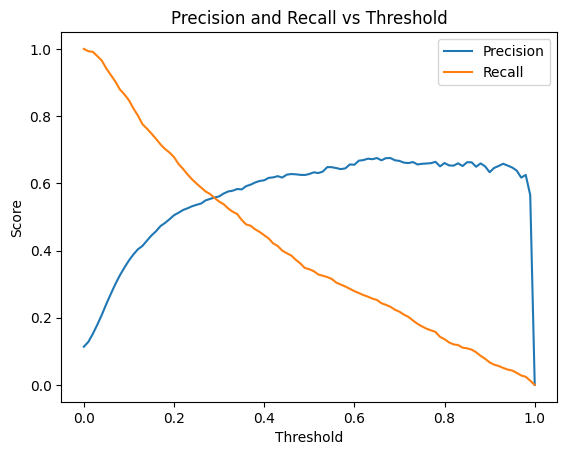

In [92]:
# Plot precision and recall curves
plt.plot(thresholds, precision, label="Precision")
plt.plot(thresholds, recall, label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision and Recall vs Threshold")
plt.show()

In [88]:
# Find the threshold where precision and recall intersect
for t, p, r in zip(thresholds, precision, recall):
    if abs(p - r) < 0.01:  # Adjust tolerance as needed
        print(f"Precision and Recall intersect at threshold: {t:.3f}")
        break

Precision and Recall intersect at threshold: 0.283
